# Activity Recognition with Machine Learning

# Importing Libraries

In [267]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [268]:
# Reading data
data_walking = pd.read_csv('walking.csv', header = None, delimiter = ';')
data_sitting = pd.read_csv('sitting.csv', header = None, delimiter = ';', skiprows = 46)
data_lying_down = pd.read_csv('lying-down.csv', header = None, delimiter = ';')
data_workout = pd.read_csv('workout.csv', header = None, delimiter = ';')
# We have four activities: walking, sitting, lying down and working out.

## Data Exploration

We need the accelerometer data, which is label '0' in column 1.

In [269]:
data_walking.head(5)

,0,1,2,3,4
0,7,0,-0.450264,3.463198,9.045989
1,7,13,118.845505,NaN,NaN
2,60,13,118.845505,NaN,NaN
3,195,13,101.867580,NaN,NaN
4,320,13,118.845505,NaN,NaN


In [270]:
data_walking[[1]] # This is column 1

,1
0,0
1,13
2,13
3,13
4,13
...,...
181656,1
181657,3
181658,0
181659,3


In [271]:
walking_accelerometer = data_walking[data_walking[1] == 0] # We will extract only the data with value 0 in column 1

In [272]:
walking_accelerometer 
# The first column is timestamp in milliseconds, the second column is the accelerometer data label, and the next are the values for X, Y and Z-axis

,0,1,2,3,4
0,7,0,-0.450264,3.463198,9.045989
224,27717,0,-10.442286,-0.179626,1.484912
225,27731,0,-11.136841,-0.131726,1.609453
226,27743,0,-11.635005,-0.098196,1.820215
227,27743,0,-11.754756,-0.174836,2.138753
...,...,...,...,...,...
181646,604510,0,-0.098196,3.072810,9.254355
181649,604510,0,-0.069456,3.226091,9.218430
181652,604510,0,-0.014370,3.482359,9.192085
181655,604521,0,-0.026345,3.870352,9.163345


We will do the same for the other data.

In [273]:
data_sitting

,0,1,2,3,4
0,5735,0,-1.736389,3.333867,9.335787
1,5745,0,-1.501677,3.199746,9.263936
2,5750,0,-1.432222,3.091970,9.309442
3,5752,0,-1.226250,3.350632,9.180110
4,5763,0,-1.384321,3.503914,9.151370
...,...,...,...,...,...
189835,609188,1,-1.401922,0.888821,9.665143
189836,609198,0,-1.556763,1.441802,9.592053
189837,609198,1,-1.405348,0.900740,9.663542
189838,609198,3,0.090408,0.026878,0.007330


In [274]:
sitting_accelerometer = data_sitting[data_sitting[1] == 0]
sitting_accelerometer

,0,1,2,3,4
0,5735,0,-1.736389,3.333867,9.335787
1,5745,0,-1.501677,3.199746,9.263936
2,5750,0,-1.432222,3.091970,9.309442
3,5752,0,-1.226250,3.350632,9.180110
4,5763,0,-1.384321,3.503914,9.151370
...,...,...,...,...,...
189824,609158,0,-1.257385,0.658630,9.841136
189827,609170,0,-1.465752,0.574805,9.982442
189830,609181,0,-1.563948,0.725691,9.972861
189833,609188,0,-1.508862,1.063389,9.824370


In [275]:
data_lying_down.head(5)

,0,1,2,3,4
0,8,0,-1.659749,6.365962,7.616162
1,8,13,0.000000,NaN,NaN
2,35,0,-0.677791,6.025869,7.891590
3,35,0,-0.866997,6.116880,7.903565
4,41,0,-0.902922,6.112090,7.893985


In [276]:
lying_accelerometer = data_lying_down[data_lying_down[1] == 0]
lying_accelerometer

,0,1,2,3,4
0,8,0,-1.659749,6.365962,7.616162
2,35,0,-0.677791,6.025869,7.891590
3,35,0,-0.866997,6.116880,7.903565
4,41,0,-0.902922,6.112090,7.893985
5,51,0,-0.797542,6.057004,7.850874
...,...,...,...,...,...
190928,607597,0,-0.886157,8.844808,-3.724256
190931,607607,0,-0.895737,9.034014,-3.690725
190934,607620,0,-1.367556,9.563313,-3.590134
190937,607625,0,-2.627337,9.970467,-3.647615


In [277]:
data_workout.head(5)

,0,1,2,3,4
0,5,0,-0.067061,8.423284,5.324129
1,6,13,0.000000,NaN,NaN
2,53,13,0.000000,NaN,NaN
3,187,13,0.000000,NaN,NaN
4,316,13,0.000000,NaN,NaN


In [278]:
workout_accelerometer = data_workout[data_workout[1] == 0]
workout_accelerometer

,0,1,2,3,4
0,5,0,-0.067061,8.423284,5.324129
43,5157,0,2.854863,-1.980681,3.978128
44,5164,0,3.262017,-2.450105,3.554209
45,5169,0,3.415298,-2.543511,3.755391
46,5180,0,3.156636,-2.304009,4.069139
...,...,...,...,...,...
189232,606600,0,0.067061,4.734954,8.176597
189235,606610,0,0.747246,4.770879,8.095166
189238,606623,0,0.584385,4.509822,8.382568
189241,606632,0,0.512534,4.129014,8.669971


So, in the next section, we will be working with: walking_accelerometer, sitting_accelerometer, lying_accelerometer and workout_accelerometer.<br/>
The duration of the data is 10 minutes. <br/>
We have 58947 data samples for walking_accelerometer, 61682 samples for sitting_accelerometer, 62037 samples for lying_accelerometer and 61475 samples for workout_accelerometer. So, we are getting 100 samples in one second.<br/>
We will take 60 000 samples for the other measurements, and 58 000 for sitting.<br/>


In [279]:
walking_accelerometer = walking_accelerometer.iloc[1:58001] # We do not need the first row, since it is not part of one whole series
sitting_accelerometer = sitting_accelerometer.iloc[:60000]
lying_accelerometer = lying_accelerometer.iloc[:60000]
workout_accelerometer = workout_accelerometer.iloc[1:60001]

In [280]:
walking_accelerometer = walking_accelerometer.rename(columns = {2:'x', 3:'y', 4:'z'}).drop(labels = 1, axis = 1)
sitting_accelerometer = sitting_accelerometer.rename(columns = {2:'x', 3:'y', 4:'z'}).drop(labels = 1, axis = 1)
lying_accelerometer = lying_accelerometer.rename(columns = {2:'x', 3:'y', 4:'z'}).drop(labels = 1, axis = 1)
workout_accelerometer = workout_accelerometer.rename(columns = {2:'x', 3:'y', 4:'z'}).drop(labels = 1, axis = 1)

Let's plot the distribution of the data in order to find out more about it.

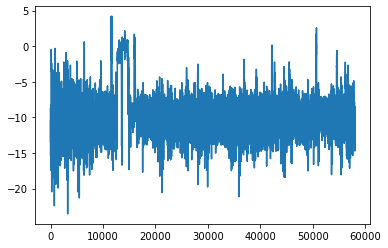

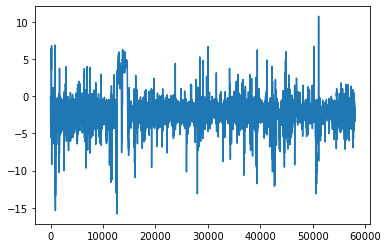

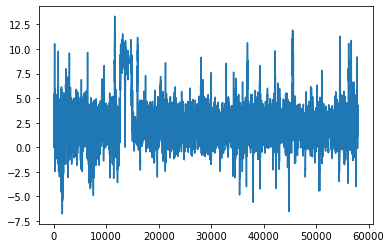

In [281]:
# Walking accelerometer
lista = [x for x in range (0,walking_accelerometer.shape[0])]
plt.figure()
plt.plot(lista, walking_accelerometer[['x']])
plt.figure()
plt.plot(lista, walking_accelerometer[['y']])
plt.figure()
plt.plot(lista, walking_accelerometer[['z']])

We can see that there is one part of the signal that is not looking good. This could be some error during data collection or just the movement of the hand of the person while walking was changed.

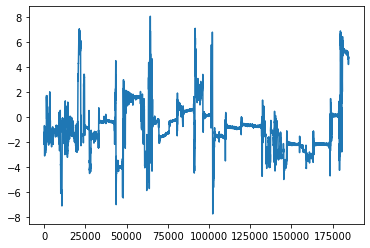

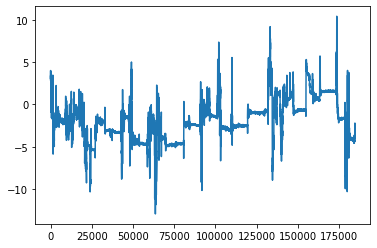

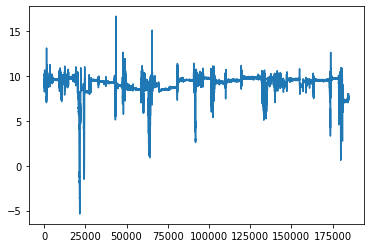

In [282]:
# Sitting accelerometer
plt.figure()
plt.plot(sitting_accelerometer[['x']])
plt.figure()
plt.plot(sitting_accelerometer[['y']])
plt.figure()
plt.plot(sitting_accelerometer[['z']])

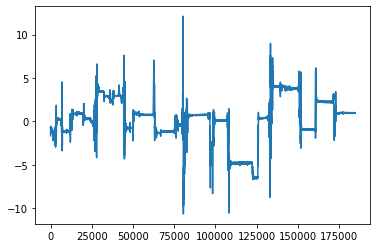

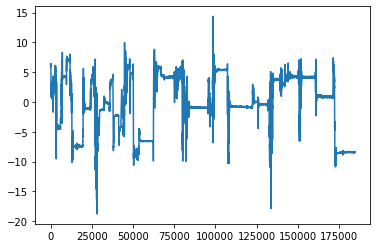

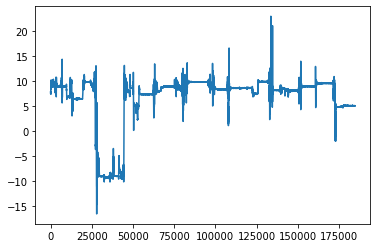

In [283]:
# Lying accelerometer
plt.figure()
plt.plot(lying_accelerometer[['x']])
plt.figure()
plt.plot(lying_accelerometer[['y']])
plt.figure()
plt.plot(lying_accelerometer[['z']])

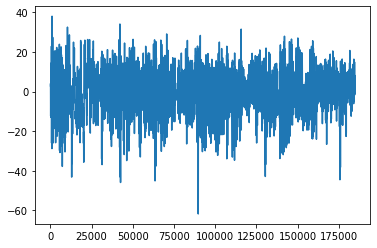

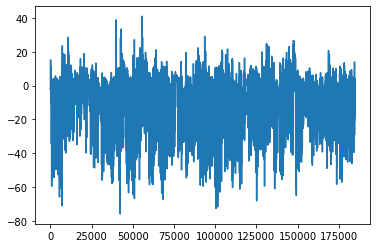

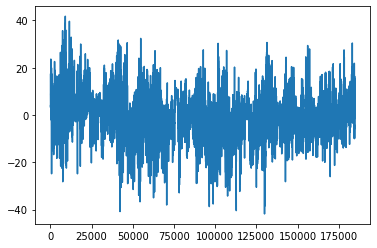

In [284]:
# Workout accelerometer
plt.figure()
plt.plot(workout_accelerometer[['x']])
plt.figure()
plt.plot(workout_accelerometer[['y']])
plt.figure()
plt.plot(workout_accelerometer[['z']])

### Basic statistics

In [285]:
walking_accelerometer.describe()

,0,x,y,z
count,58000.000000,58000.000000,58000.000000,58000.000000
mean,311499.729086,-9.246456,-2.157680,2.427165
std,163849.283929,2.964223,1.883060,2.171392
min,27717.000000,-23.569387,-15.821500,-6.782696
25%,169601.500000,-10.899735,-2.914739,1.125659
50%,311500.500000,-9.366921,-2.148333,2.184258
75%,453389.500000,-8.152647,-1.429827,3.276387
max,595295.000000,4.205655,10.756033,13.340260


In [286]:
sitting_accelerometer.describe()

,0,x,y,z
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,299239.263033,-0.776214,-1.812748,9.136854
std,169462.588246,1.936057,2.372588,1.182653
min,5735.000000,-7.735913,-12.949871,-5.367239
25%,152493.500000,-2.074087,-3.257227,8.926238
50%,299233.000000,-0.838257,-1.978286,9.467513
75%,445985.500000,0.081431,-0.653840,9.644744
max,592753.000000,8.044871,10.425521,16.700472


In [287]:
lying_accelerometer.describe()

,0,x,y,z
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,293665.383967,0.260814,-0.092606,6.740317
std,169663.729092,2.473293,4.533946,5.101082
min,8.000000,-10.657837,-18.769770,-16.621437
25%,146782.750000,-0.938848,-2.177073,7.319180
50%,293500.500000,0.579595,-0.241897,8.569380
75%,440251.000000,1.818419,4.127218,9.299861
max,587715.000000,12.109220,14.396463,23.008953


In [288]:
workout_accelerometer.describe()

,0,x,y,z
count,60000.000000,60000.000000,60000.000000,60000.000000
mean,298709.578733,-0.585512,-9.469357,-0.502783
std,169480.515457,8.236244,12.435157,7.568735
min,5157.000000,-61.789112,-75.811950,-41.824226
25%,152134.000000,-5.637876,-16.243622,-4.524192
50%,298811.000000,-0.658630,-6.777905,-0.744851
75%,445472.500000,5.110972,-0.658032,3.370391
max,592226.000000,38.073627,41.021896,41.793090


### Calculating magnitude

In [289]:
walking_accelerometer['x']

224      -10.442286
225      -11.136841
226      -11.635005
227      -11.754756
228      -11.242222
            ...    
178734   -14.731766
178739   -14.142591
178741   -12.985797
178744   -11.781101
178747   -10.854229
Name: x, Length: 58000, dtype: float64

In [290]:
walking_accelerometer['magnitude'] = np.sqrt(walking_accelerometer['x']**2 + walking_accelerometer['y']**2 + walking_accelerometer['z']**2)
sitting_accelerometer['magnitude'] = np.sqrt(sitting_accelerometer['x']**2 + sitting_accelerometer['y']**2 + sitting_accelerometer['z']**2)
lying_accelerometer['magnitude'] = np.sqrt(lying_accelerometer['x']**2 + lying_accelerometer['y']**2 + lying_accelerometer['z']**2)
workout_accelerometer['magnitude'] = np.sqrt(workout_accelerometer['x']**2 + workout_accelerometer['y']**2 + workout_accelerometer['z']**2)

### Plotting the magnitude for all activities

<AxesSubplot:>

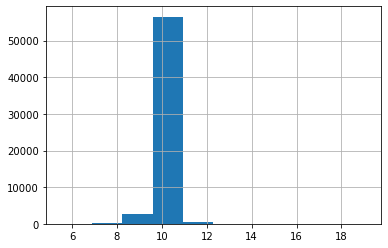

In [291]:
sitting_accelerometer.magnitude.hist()

<AxesSubplot:>

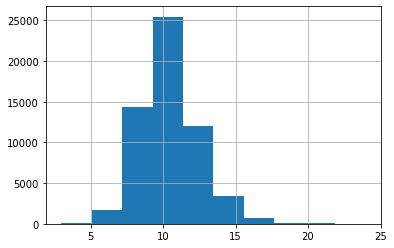

In [292]:
walking_accelerometer.magnitude.hist()

<AxesSubplot:>

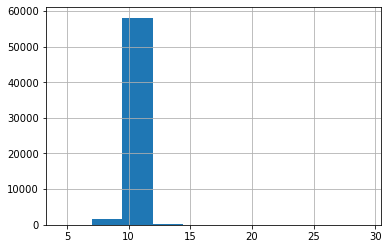

In [293]:
lying_accelerometer.magnitude.hist()

<AxesSubplot:>

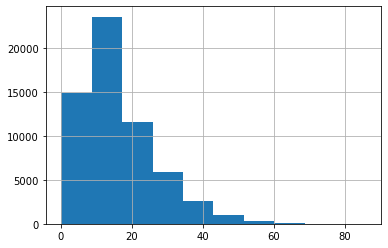

In [294]:
workout_accelerometer.magnitude.hist()

So, sitting and lying are similar, but we hope that the model will still distinguish this two activities.

In [295]:
#Visualize the impact of mean-filtering in time domain
#plot mean-filtered accelreation data
def mean_filter(data, axis):
    plt.figure(figsize = (15,5))
    plt.plot(data[axis],label = axis)
    plt.plot(data[axis].rolling(window=10).mean(),label = 'Mean filtering') #moving window with a size of 10 samples
    plt.legend()
    plt.title("MEAN-FILTERED ACCELERATION DATA")
    plt.show()

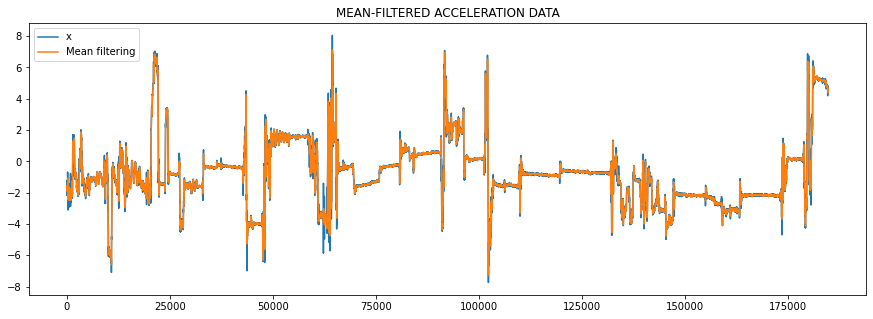

In [296]:
mean_filter(sitting_accelerometer, 'x')

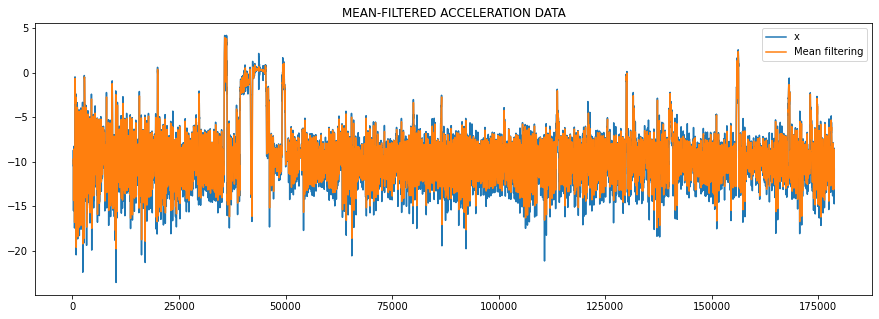

In [297]:
mean_filter(walking_accelerometer, 'x')

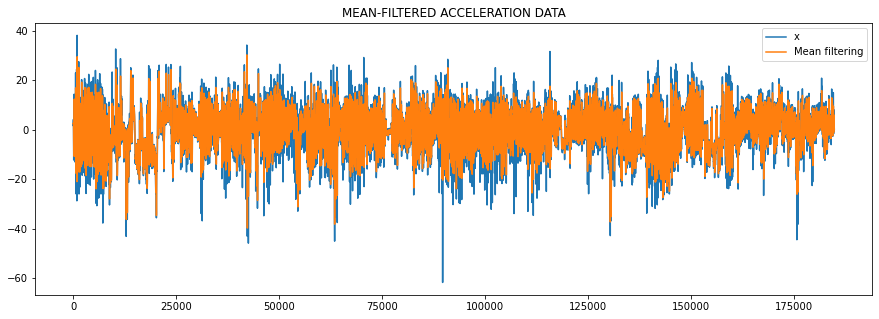

In [298]:
mean_filter(workout_accelerometer, 'x')

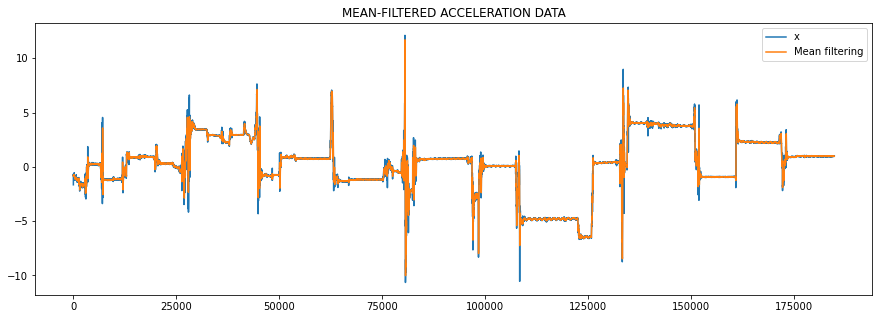

In [299]:
mean_filter(lying_accelerometer, 'x')

In [300]:
segment = walking_accelerometer['x'].values
sampling_frequency = 100

frequencies, time, spec = signal.spectrogram(segment, sampling_frequency)

spec

array([[5.48293346e-02, 4.91820150e-01, 1.24281110e-04, ...,
        2.14606019e-03, 4.21268170e-02, 2.53164004e-01],
       [2.73228578e+01, 7.05905197e-01, 9.21927752e-01, ...,
        2.19475879e-01, 4.87659900e-01, 2.34035218e+00],
       [2.64979211e+01, 4.16523039e+00, 3.86091962e-01, ...,
        6.86472161e-01, 6.79991900e-01, 3.42132620e+00],
       ...,
       [3.40042046e-07, 5.69760501e-07, 8.46052471e-07, ...,
        4.84094284e-06, 1.28149826e-06, 1.80980453e-06],
       [1.51325771e-06, 9.03800156e-07, 9.49069983e-07, ...,
        7.73414922e-07, 1.64127863e-07, 2.72651845e-06],
       [1.16274088e-06, 9.97949516e-08, 4.07127721e-06, ...,
        4.17151655e-07, 2.41623288e-08, 2.98858453e-07]])

In [301]:
#Visualize the impact of mean-filtering in frequency domain
def mean_filter_freq(data, axis, freq):
    segment = data[axis].values
    sampling_frequency = freq
    frequencies, time, spec = signal.spectrogram(segment, sampling_frequency)
    plt.pcolormesh(time, frequencies, spec)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("SPECTROGRAM - ACCELERATION DATA")
    plt.show()

    segment_mean = data[axis].rolling(window=50).mean()
    frequencies, time, spec = signal.spectrogram(segment_mean, sampling_frequency)
    plt.pcolormesh(time, frequencies, spec)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.title("SPECTROGRAM - MEAN-FILTERED ACCELERATION DATA")
    plt.show()

<ipython-input-301-6b82bfe16d42>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


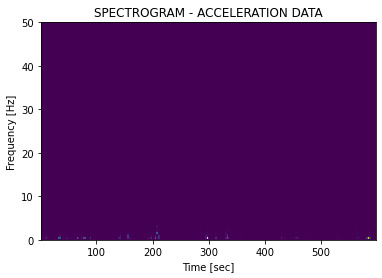

<ipython-input-301-6b82bfe16d42>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


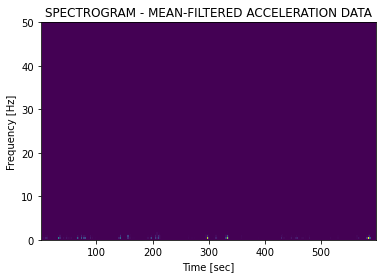

In [302]:
mean_filter_freq(sitting_accelerometer, 'x', 100)

<ipython-input-301-6b82bfe16d42>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


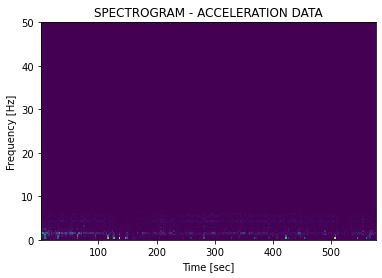

<ipython-input-301-6b82bfe16d42>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


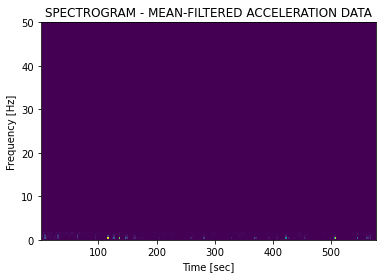

In [303]:
mean_filter_freq(walking_accelerometer, 'x', 100)

<ipython-input-301-6b82bfe16d42>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


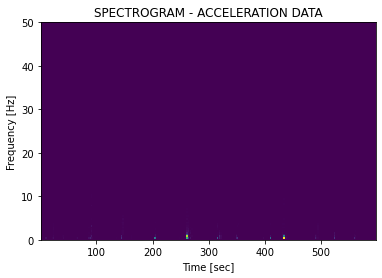

<ipython-input-301-6b82bfe16d42>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


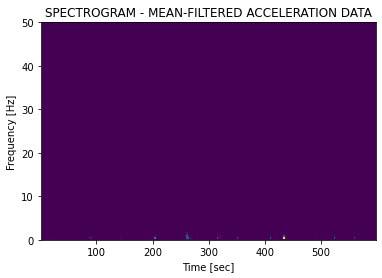

In [304]:
mean_filter_freq(lying_accelerometer, 'x', 100)

<ipython-input-301-6b82bfe16d42>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


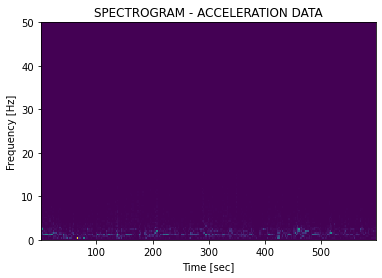

<ipython-input-301-6b82bfe16d42>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(time, frequencies, spec)


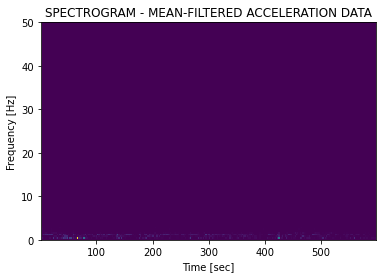

In [305]:
mean_filter_freq(workout_accelerometer, 'x', 100)

### Feature Extraction

We will use moving-average filter and extract features.
We will create new column magnitude, since we are filtering the data.

In [306]:
walking_accelerometer

,0,x,y,z,magnitude
224,27717,-10.442286,-0.179626,1.484912,10.548866
225,27731,-11.136841,-0.131726,1.609453,11.253307
226,27743,-11.635005,-0.098196,1.820215,11.776934
227,27743,-11.754756,-0.174836,2.138753,11.949022
228,27747,-11.242222,-0.325723,2.514771,11.524657
...,...,...,...,...,...
178734,595256,-14.731766,-2.100432,3.839217,15.368029
178739,595272,-14.142591,-1.983076,3.781736,14.773185
178741,595272,-12.985797,-1.863325,3.640430,13.614538
178744,595283,-11.781101,-1.702859,3.381768,12.374588


In [307]:
def filtering(data):
    '''This function filters the data with window_size = 10'''
    new_data = pd.DataFrame(columns = ['x', 'y', 'z'])
    new_data['x'] = data['x'].rolling(window=10).mean()
    new_data['y'] = data['y'].rolling(window=10).mean()
    new_data['z'] = data['z'].rolling(window=10).mean()
    return new_data.dropna(axis = 0)

In [308]:
walking_accelerometer_filtered = filtering(walking_accelerometer)

In [309]:
walking_accelerometer_filtered

,x,y,z
233,-10.242062,-0.376737,2.374183
235,-10.104109,-0.442600,2.470463
236,-9.937176,-0.516845,2.520040
238,-9.771680,-0.598755,2.506388
240,-9.652648,-0.675156,2.410827
...,...,...,...
178734,-12.035931,-2.298979,3.981960
178739,-12.470867,-2.247965,3.939089
178741,-12.766413,-2.187132,3.888793
178744,-12.909156,-2.114084,3.816224


In [310]:
# let's do the same for the other data
lying_accelerometer_filtered = filtering(lying_accelerometer)
sitting_accelerometer_filtered = filtering(sitting_accelerometer)
workout_accelerometer_filtered = filtering(workout_accelerometer)

In [311]:
lying_accelerometer_filtered # Just checking

,x,y,z
10,-0.861968,6.073530,7.813273
11,-0.774549,6.039281,7.832912
12,-0.785327,6.039760,7.828840
13,-0.780058,6.032336,7.828122
15,-0.775028,6.025869,7.829559
...,...,...,...
184658,0.977647,-8.405801,5.059239
184661,0.977647,-8.404603,5.057084
184664,0.977408,-8.404364,5.056365
184667,0.978126,-8.404603,5.054449


In [312]:
def feature_extraction(data):
    new_data = pd.DataFrame(columns = ['magnitude', 'skew', 'std', 'q0.25', 'q0.75'])
    new_data['magnitude'] = np.sqrt(data['x']**2 + data['y']**2 + data['z']**2)
    new_data['skew'] = data.skew(axis = 1)
    new_data['std'] = data.std(axis = 1)
    new_data['q0.25'] = data.quantile(q = 0.25, axis = 1)
    new_data['q0.75'] = data.quantile(q = 0.75, axis = 1)
    return new_data

In [313]:
walking_acc_features = feature_extraction(walking_accelerometer_filtered)
lying_acc_features = feature_extraction(lying_accelerometer_filtered)
sitting_acc_features = feature_extraction(sitting_accelerometer_filtered)
workout_acc_features = feature_extraction(workout_accelerometer_filtered)

In [314]:
walking_acc_features

,magnitude,skew,std,q0.25,q0.75
233,10.520385,-1.403060,6.634026,-5.309399,0.998723
235,10.411153,-1.358272,6.582180,-5.273354,1.013932
236,10.264755,-1.315938,6.495480,-5.227011,1.001597
238,10.105752,-1.282589,6.384035,-5.185218,0.953817
240,9.972037,-1.271671,6.266925,-5.163902,0.867835
...,...,...,...,...,...
178734,12.884291,-0.629228,8.070845,-7.167455,0.841490
178739,13.269977,-0.711240,8.287279,-7.359416,0.845562
178741,13.523592,-0.776033,8.428463,-7.476772,0.850831
178744,13.626416,-0.829066,8.479784,-7.511620,0.851070


In [315]:
walking_acc_features['label'] = 'walking'
sitting_acc_features['label'] = 'sitting'
workout_acc_features['label'] = 'workout'
lying_acc_features['label'] = 'lying'

In [316]:
walking_acc_features

,magnitude,skew,std,q0.25,q0.75,label
233,10.520385,-1.403060,6.634026,-5.309399,0.998723,walking
235,10.411153,-1.358272,6.582180,-5.273354,1.013932,walking
236,10.264755,-1.315938,6.495480,-5.227011,1.001597,walking
238,10.105752,-1.282589,6.384035,-5.185218,0.953817,walking
240,9.972037,-1.271671,6.266925,-5.163902,0.867835,walking
...,...,...,...,...,...,...
178734,12.884291,-0.629228,8.070845,-7.167455,0.841490,walking
178739,13.269977,-0.711240,8.287279,-7.359416,0.845562,walking
178741,13.523592,-0.776033,8.428463,-7.476772,0.850831,walking
178744,13.626416,-0.829066,8.479784,-7.511620,0.851070,walking


In [317]:
frames = [walking_acc_features, sitting_acc_features, workout_acc_features, lying_acc_features]
result = pd.concat(frames) # We concatenate all data together

In [318]:
result # Data for training and testing

,magnitude,skew,std,q0.25,q0.75,label
233,10.520385,-1.403060,6.634026,-5.309399,0.998723,walking
235,10.411153,-1.358272,6.582180,-5.273354,1.013932,walking
236,10.264755,-1.315938,6.495480,-5.227011,1.001597,walking
238,10.105752,-1.282589,6.384035,-5.185218,0.953817,walking
240,9.972037,-1.271671,6.266925,-5.163902,0.867835,walking
...,...,...,...,...,...,...
184658,9.859472,-1.076390,6.904296,-3.714077,3.018443,lying
184661,9.857345,-1.076768,6.902722,-3.713478,3.017366,lying
184664,9.856748,-1.076831,6.902255,-3.713478,3.016887,lying
184667,9.856041,-1.077537,6.901668,-3.713238,3.016288,lying


In [319]:
x = result.iloc[:,:5]
y = result[['label']]

In [320]:
labelencoder = LabelEncoder()
y['label code'] = labelencoder.fit_transform(y)

C:\Users\melanija\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-320-bc7fff3acbba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['label code'] = labelencoder.fit_transform(y)


In [321]:
X_train, X_test, y_train, y_test = train_test_split(x, y['label code'], test_size=0.33, random_state = 1) # Train and test split

# MODEL 1

In [322]:
clf = RandomForestClassifier(n_estimators = 500, max_depth=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=500, random_state=0)

In [323]:
y_pred = clf.predict(X_test)

In [324]:
y_pred

array([3, 0, 0, ..., 0, 3, 3])

In [325]:
clf.score(X_test, y_test)

0.9185523819226018

In [326]:
labelencoder.classes_

array(['lying', 'sitting', 'walking', 'workout'], dtype=object)

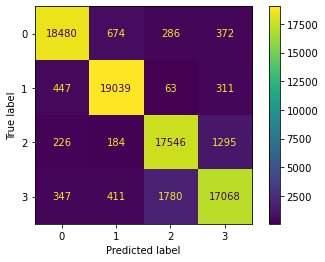

In [327]:
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)

In [329]:
def evaluate_model(model, X_test, y_test):
    """This function predicts X_test and display the information about the predicted value and the real value"""
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test, y_pred))

In [330]:
evaluate_model(clf, X_test, y_test)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94     19812
           1       0.94      0.96      0.95     19860
           2       0.89      0.91      0.90     19251
           3       0.90      0.87      0.88     19606

    accuracy                           0.92     78529
   macro avg       0.92      0.92      0.92     78529
weighted avg       0.92      0.92      0.92     78529



# MODEL 2

In [331]:
def build_model():
    """This function returns machine learning pipeline"""
    pipeline = Pipeline([

       ('clf', KNeighborsClassifier())
        #('clf',RandomForestClassifier())
    ])

    # specify parameters for grid search
    parameters = {'clf__n_neighbors'  : [4, 10],


   }

    # create grid search object
    cv = GridSearchCV(pipeline, param_grid = parameters, cv = 3)
    # cv = GridSearchCV(pipeline, param_grid=parameters)
    return cv

In [332]:
model = build_model()

In [333]:
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Pipeline(steps=[('clf', KNeighborsClassifier())]),
             param_grid={'clf__n_neighbors': [4, 10]})

In [334]:
evaluate_model(model, X_test, y_test)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     19812
           1       0.93      0.96      0.94     19860
           2       0.88      0.92      0.90     19251
           3       0.91      0.84      0.88     19606

    accuracy                           0.91     78529
   macro avg       0.91      0.91      0.91     78529
weighted avg       0.91      0.91      0.91     78529

